In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from gcmc_post_processing import load_xyz, load_txt_data, compute_local_density, load_dump_file
from collections import defaultdict
from MDAnalysis.coordinates.LAMMPS import DumpReader

def average_by_num_particles(num_particles, pressures, energies):
    """
    Averages pressure and energy based on the number of particles.

    Parameters
    ----------
    num_particles : list of int
        List of particle counts at each timestep.
    pressures : list of float
        List of pressure values.
    energies : list of float
        List of energy values.

    Returns
    -------
    avg_data : dict
        Dictionary with num_particles as keys and (avg_pressure, avg_energy) as values.
    """
    pressure_data = defaultdict(list)
    energy_data = defaultdict(list)

    for n, p, e in zip(num_particles, pressures, energies):
        pressure_data[n].append(p)
        energy_data[n].append(e)

    avg_data = {}
    for n in sorted(pressure_data.keys()):
        avg_p = np.mean(pressure_data[n])
        avg_e = np.mean(energy_data[n])
        avg_data[n] = (avg_p, avg_e)
    
    return avg_data

In [121]:
T = 0.42
for z in [0.016, 0.017, 0.018, 0.0186, 0.0188, 0.019, 0.0192, 0.0194, 0.0196]:
    filename = f'data_T{T}_z_{z}_L40.txt'
    _, num_particles, pressures, energies = load_txt_data(filename, 100000)
    averaged_results = average_by_num_particles(num_particles, pressures, energies)
    # Extract sorted data for plotting
    sorted_particles = np.array(sorted(averaged_results.keys()))
    avg_pressures = [averaged_results[n][0] for n in sorted_particles]
    avg_energies  = [averaged_results[n][1] for n in sorted_particles]

    plt.scatter(sorted_particles/1600, avg_energies, label = f'z = {z}', marker='.')
    plt.xlabel(r'$\rho$')
    plt.ylabel(r'$< E >$')
    plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'data_T0.42_z_0.016_L40.txt'

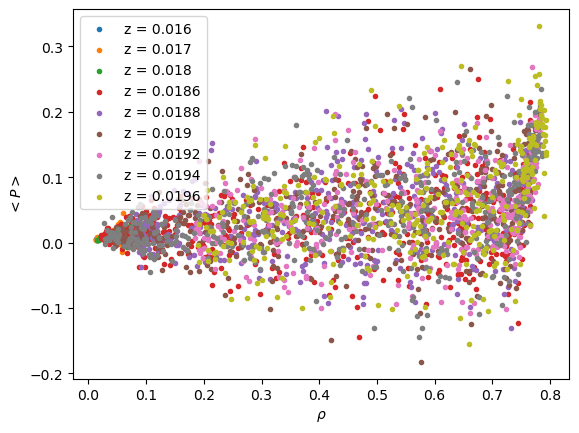

In [ ]:
T = 0.42
for z in [0.016, 0.017, 0.018, 0.0186, 0.0188, 0.019, 0.0192, 0.0194, 0.0196]:
    filename = f'data_T{T}_z_{z}_L40.txt'
    _, num_particles, pressures, energies = load_txt_data(filename, 100000)
    averaged_results = average_by_num_particles(num_particles, pressures, energies)
    # Extract sorted data for plotting
    sorted_particles = np.array(sorted(averaged_results.keys()))
    avg_pressures = [averaged_results[n][0] for n in sorted_particles]
    avg_energies  = [averaged_results[n][1] for n in sorted_particles]

    plt.scatter(sorted_particles/1600, avg_pressures, label = f'z = {z}', marker='.')
    plt.xlabel(r'$\rho$')
    plt.ylabel(r'$< P >$')
    plt.legend()

In [122]:
# Loop over different z values
for z in [0.017, 0.018, 0.0186, 0.0188, 0.019, 0.0192, 0.0194, 0.0196]:
    xyz_file = f'positions_T0.42_z_{z}_L40.xyz'
    trj, box = load_dump_file(xyz_file)
    dens = np.array([])
    
    for t in trj[100::10]:
        l = compute_local_density(t, box, rcutoff=0.1)
        dens = np.append(dens, l.density)
    
    sns.kdeplot(dens, label=f"T = 0.42, z = {z}", bw_adjust=1.5)  # optional: adjust bandwidth

plt.xlabel("Local Density")
plt.ylabel("Density Estimate")
plt.legend()
plt.tight_layout()
plt.show()

RuntimeError: File does not exist: positions_T0.42_z_0.017_L40.xyz

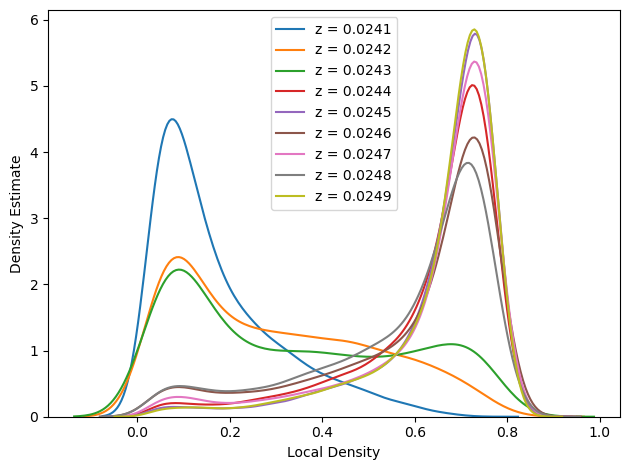

In [130]:
# Loop over different z values
for z in [0.0241, 0.0242, 0.0243, 0.0244, 0.0245, 0.0246, 0.0247, 0.0248, 0.0249]:
    xyz_file = f'positions_T0.45_z_{z}_L40.xyz'
    trj, box = load_dump_file(xyz_file)
    dens = np.array([])
    
    for t in trj[100::10]:
        l = compute_local_density(t, box, rcutoff=0.2)
        dens = np.append(dens, l.density)
    
    sns.kdeplot(dens, label=f"z = {z}", bw_adjust=1.5)  # optional: adjust bandwidth

plt.xlabel("Local Density")
plt.ylabel("Density Estimate")
plt.legend()
plt.tight_layout()
plt.show()

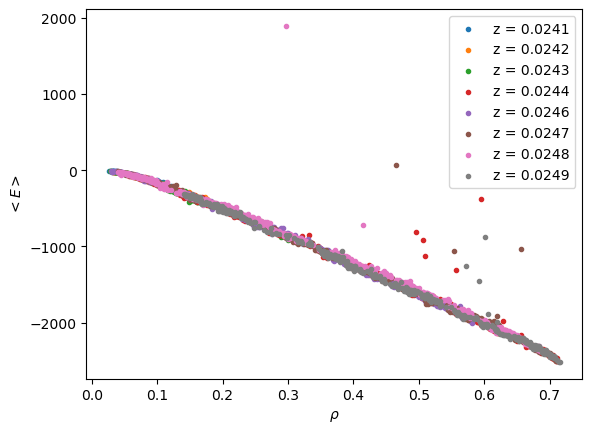

In [131]:
T = 0.45
for z in [0.0241, 0.0242, 0.0243, 0.0244,  0.0246, 0.0247, 0.0248, 0.0249]:
    filename = f'data_T{T}_z_{z}_L40.txt'
    _, num_particles, pressures, energies = load_txt_data(filename, 10)
    averaged_results = average_by_num_particles(num_particles, pressures, energies)
    # Extract sorted data for plotting
    sorted_particles = np.array(sorted(averaged_results.keys()))
    avg_pressures = [averaged_results[n][0] for n in sorted_particles]
    avg_energies  = [averaged_results[n][1] for n in sorted_particles]

    plt.scatter(sorted_particles/1600, avg_energies , label = f'z = {z}', marker='.')
    plt.xlabel(r'$\rho$')
    plt.ylabel(r'$< E >$')
    plt.legend()

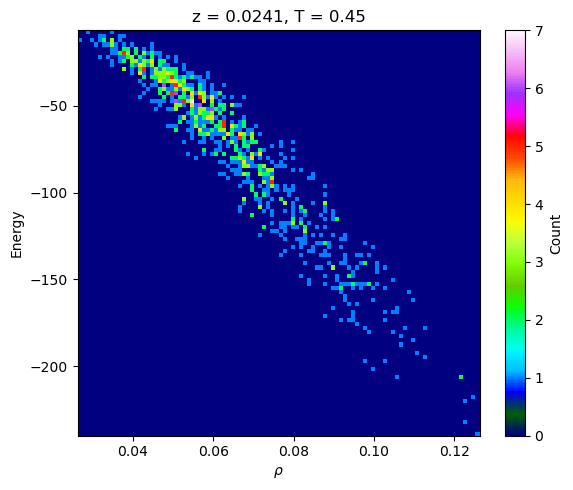

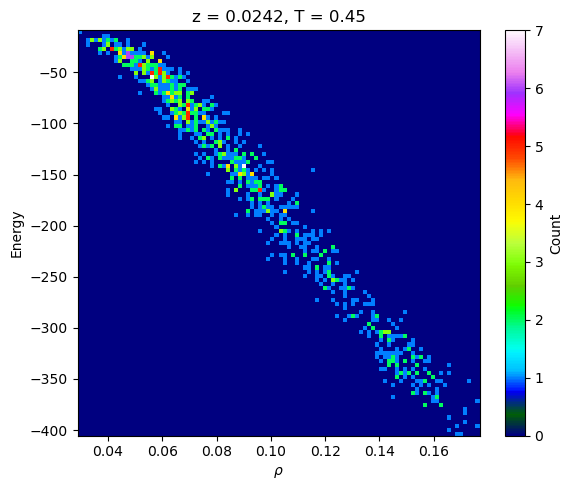

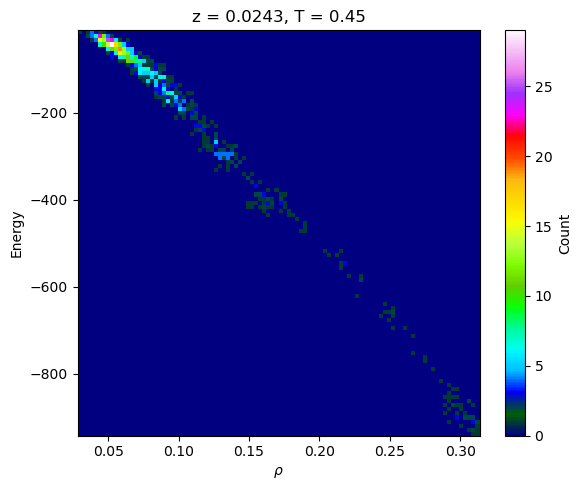

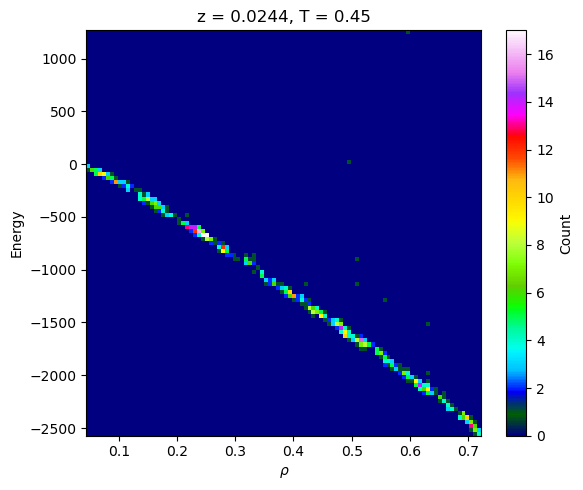

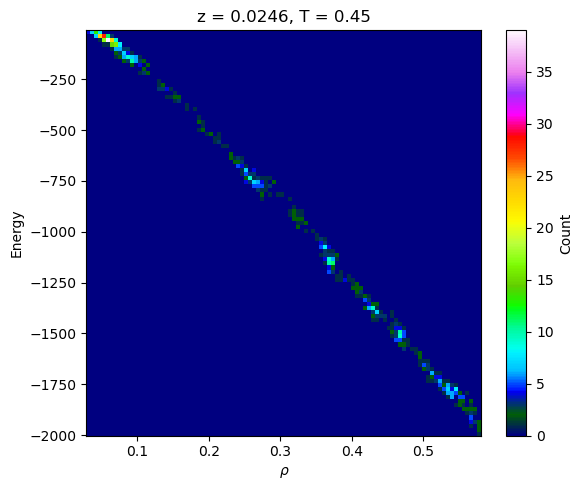

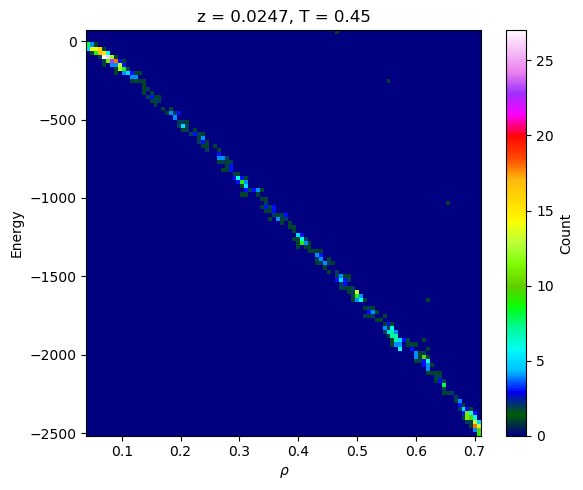

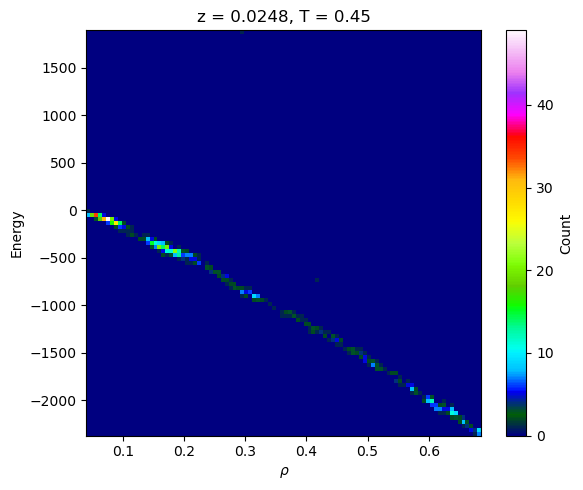

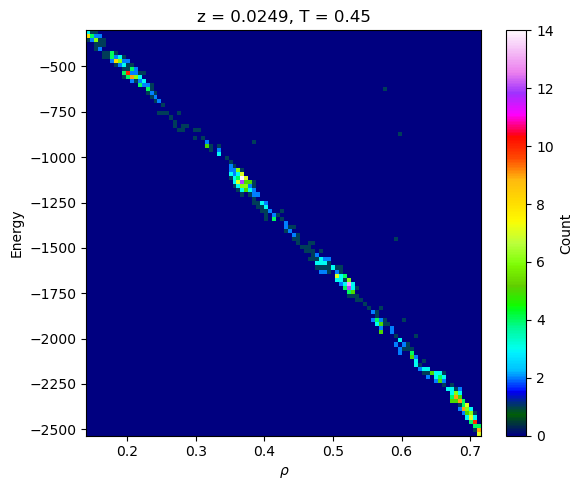

In [133]:
T = 0.45
density_bins = 100  # finer bins for density
energy_bins = 100   # finer bins for energy
plt.style.use('default')  # Ensures clean base style

for z in [0.0241, 0.0242, 0.0243, 0.0244,  0.0246, 0.0247, 0.0248, 0.0249]:
    filename = f'data_T{T}_z_{z}_L40.txt'
    _, num_particles, pressures, energies = load_txt_data(filename, 10)
    num_particles = np.array(num_particles)
    densities = num_particles / 1600

    plt.figure(figsize=(6, 5))
    h = plt.hist2d(densities, energies, bins=[density_bins, energy_bins], cmap='gist_ncar')
    plt.title(f'z = {z}, T = {T}')
    plt.xlabel(r'$\rho$')
    plt.ylabel('Energy')
    plt.colorbar(h[3], label='Count')
    plt.tight_layout()
    plt.show()

In [ ]:
def compute_histogram_N_E(num_particles, energies, 
                          bins=(100, 100), density=True):
    """
    Compute a 2D histogram of N (or density) vs E.

    Returns:
    - H: 2D histogram array (counts)
    - xedges: bin edges for density or N
    - yedges: bin edges for energy
    """

    x = np.array(num_particles)
    y = np.array(energies)

    H, xedges, yedges = np.histogram2d(x, y, bins=bins)
    return H, xedges, yedges

In [ ]:
h = {}

In [ ]:
h[0.241] = 1
h

{0.241: 1}

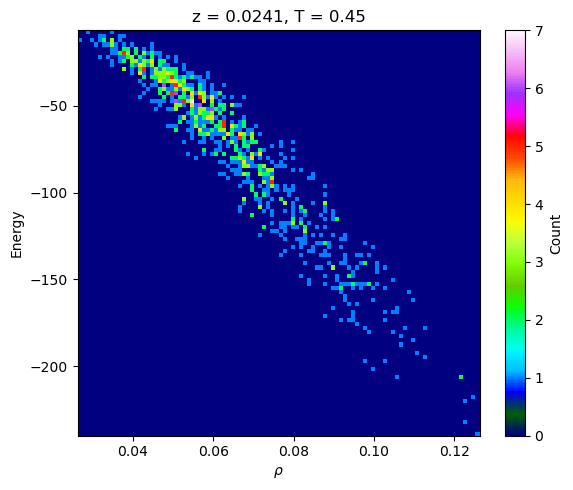

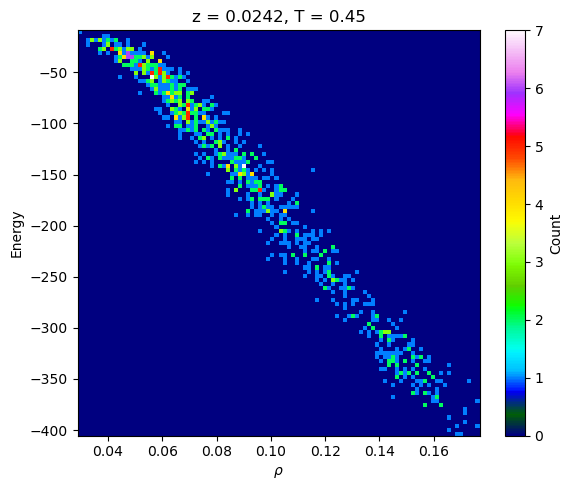

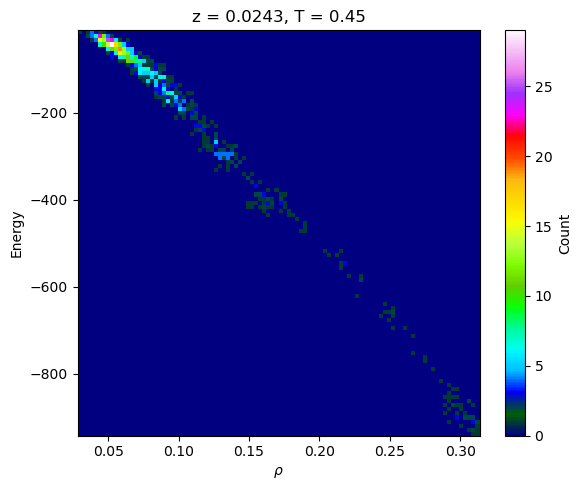

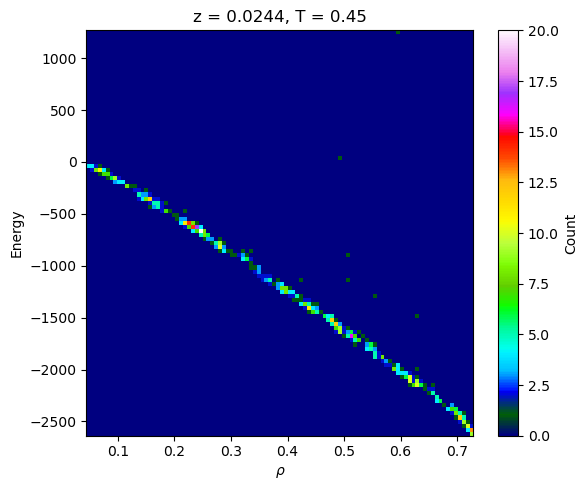

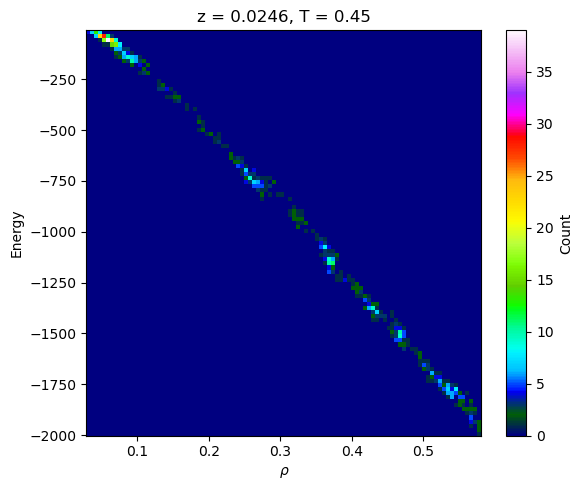

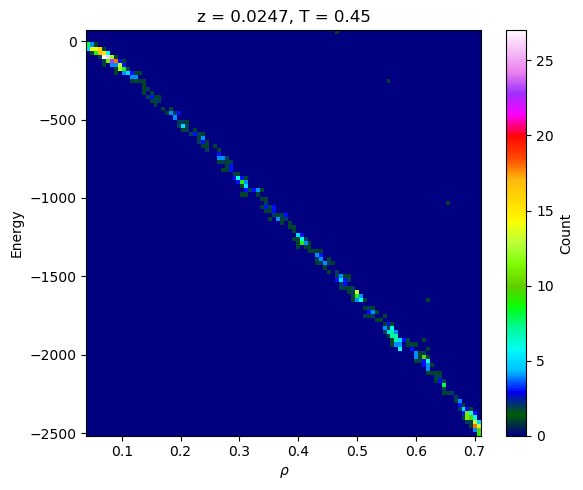

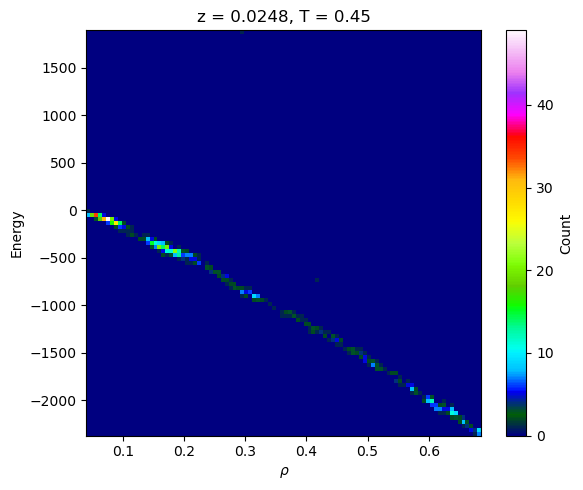

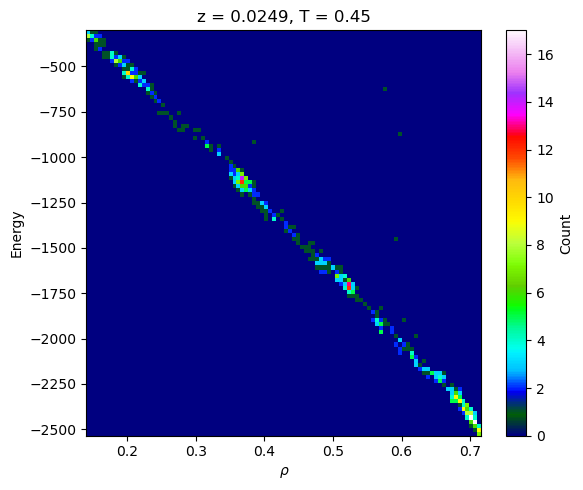

In [134]:
T = 0.45
density_bins = 100  # finer bins for density
energy_bins = 100   # finer bins for energy
plt.style.use('default')  # Ensures clean base style
Hist = {}
for z in [0.0241, 0.0242, 0.0243, 0.0244,  0.0246, 0.0247, 0.0248, 0.0249]:
    filename = f'data_T{T}_z_{z}_L40.txt'
    _, num_particles, pressures, energies = load_txt_data(filename, 10)
    num_particles = np.array(num_particles)
    densities = num_particles / 1600
    Hist[(z, T)] = compute_histogram_N_E(densities, energies)
    plt.figure(figsize=(6, 5))
    h = plt.hist2d(densities, energies, bins=[density_bins, energy_bins], cmap='gist_ncar')
    plt.title(f'z = {z}, T = {T}')
    plt.xlabel(r'$\rho$')
    plt.ylabel('Energy')
    plt.colorbar(h[3], label='Count')
    plt.tight_layout()
    plt.show()

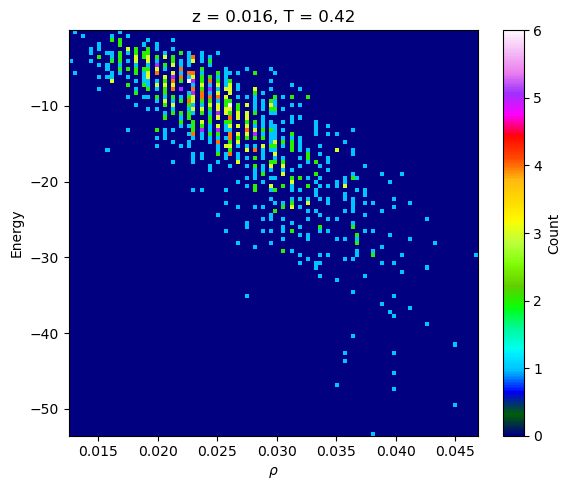

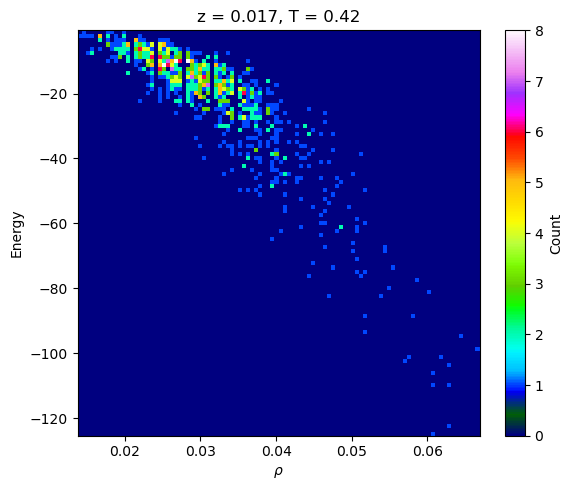

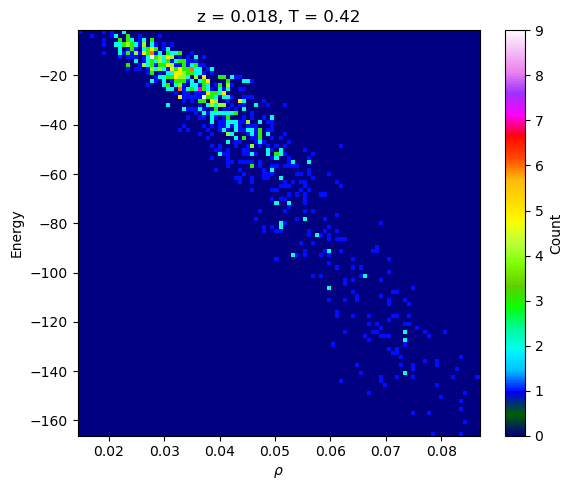

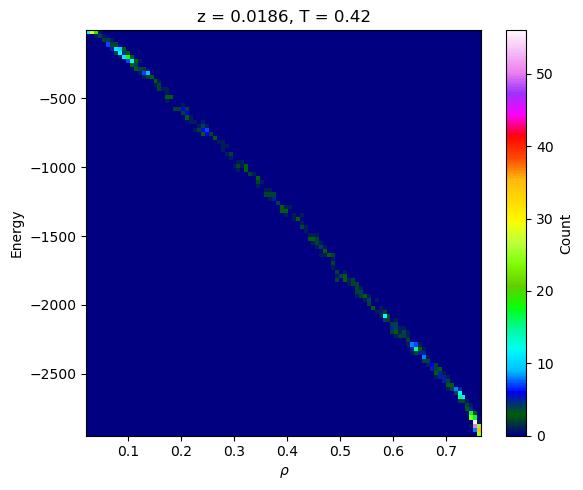

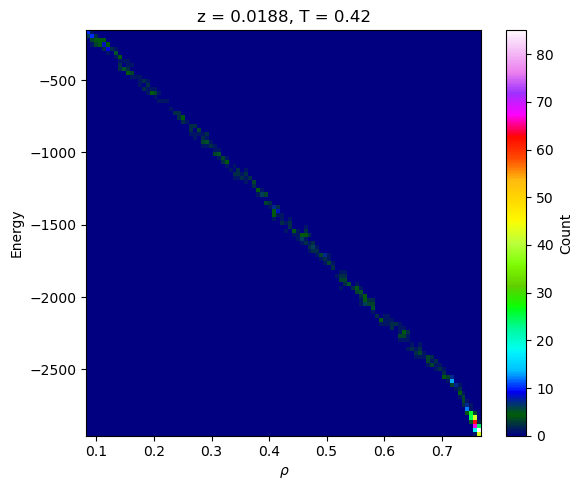

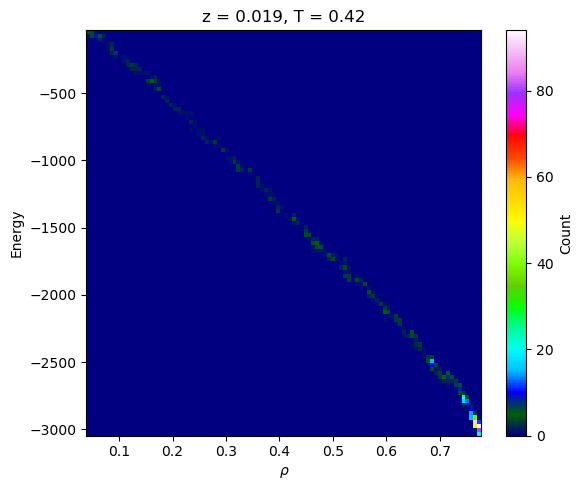

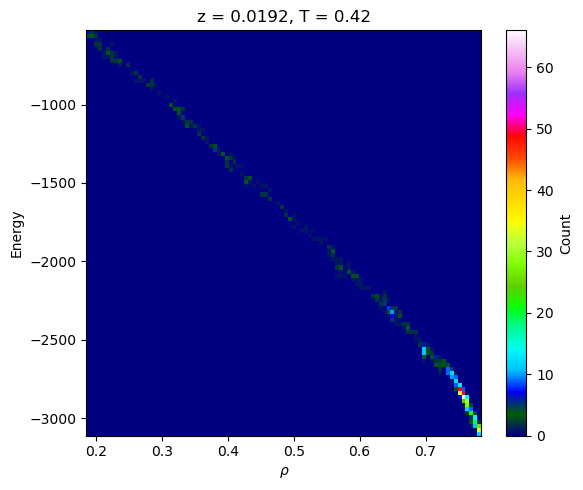

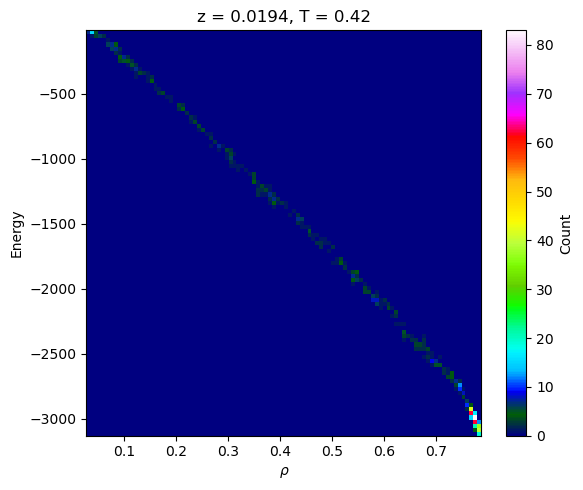

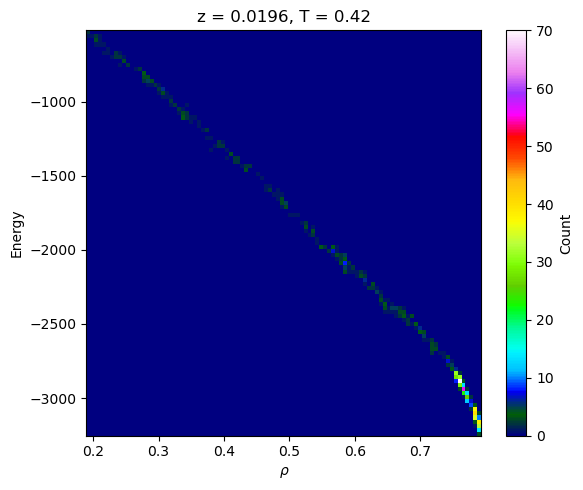

In [ ]:
T = 0.42
density_bins = 100  # finer bins for density
energy_bins = 100   # finer bins for energy

for z in [0.016, 0.017, 0.018, 0.0186, 0.0188, 0.019, 0.0192, 0.0194, 0.0196]:
    filename = f'data_T{T}_z_{z}_L40.txt'
    _, num_particles, pressures, energies = load_txt_data(filename, 100000)
    num_particles = np.array(num_particles)
    densities = num_particles / 1600
    Hist[(z, T)] = compute_histogram_N_E(densities, energies)
    plt.figure(figsize=(6, 5))
    h = plt.hist2d(densities, energies, bins=[density_bins, energy_bins], cmap='gist_ncar')
    plt.title(f'z = {z}, T = {T}')
    plt.xlabel(r'$\rho$')
    plt.ylabel('Energy')
    plt.colorbar(h[3], label='Count')
    plt.tight_layout()
    plt.show()

In [ ]:
T = 0.45
z = 0.0244


In [ ]:
H, density, energues = Hist[(z,T)]

In [ ]:
N = np.sum(H)

In [ ]:
N

1000.0

In [ ]:
import freud

In [ ]:
box = freud.box.Box(Lx=37.2242, Ly=42.9828, Lz=0.0)

In [ ]:
ld = freud.density.LocalDensity(r_max=5, diameter=1)

In [ ]:
a = ld.compute(system = (box, trj[10].positions), query_points=trj[10].positions)

AttributeError: 'numpy.ndarray' object has no attribute 'positions'

In [ ]:
a.density

array([0.339553  , 0.43968597, 0.45824897, 0.23987517, 0.3239921 ,
       0.4181951 , 0.31564587, 0.28495315, 0.31616613, 0.41019621,
       0.304306  , 0.429385  , 0.3114474 , 0.35719746, 0.34659785,
       0.42901087, 0.28784826, 0.22372766, 0.23393685, 0.33003497,
       0.08912677, 0.06999478, 0.36642197, 0.43009496, 0.06725348,
       0.08512466, 0.07477161, 0.28977787, 0.37258816, 0.17009583,
       0.09996905, 0.3789661 , 0.28302926, 0.41276965, 0.39517215,
       0.08509936, 0.03819719, 0.38258466, 0.10064134, 0.36691335,
       0.05092958, 0.0441961 , 0.03819719, 0.03819719, 0.06366198,
       0.07639437, 0.3019839 , 0.05888529, 0.06366198, 0.09785705,
       0.03179759, 0.34376153, 0.05963457, 0.08628871, 0.07639437,
       0.03790732, 0.03819719, 0.02621442, 0.26408985, 0.03529561,
       0.26188084, 0.04972547, 0.1878754 , 0.05092958, 0.03528544,
       0.05609631, 0.04004547, 0.01273239, 0.01386189, 0.07738698,
       0.06366198, 0.01273239, 0.05092958, 0.03067905, 0.01273

(array([6., 1., 1., 1., 2., 7., 1., 2., 6., 1., 2., 3., 2., 2., 3., 0., 3.,
        1., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 2., 1., 0., 1., 1., 0., 2.,
        1., 1., 0., 1., 0., 1., 2., 0., 0., 1., 0., 2., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 2., 0., 1., 0., 3., 0., 1., 0., 0., 0., 1.]),
 array([0.01273239, 0.01718756, 0.02164273, 0.02609789, 0.03055306,
        0.03500823, 0.03946339, 0.04391855, 0.04837372, 0.05282889,
        0.05728405, 0.06173922, 0.06619439, 0.07064955, 0.07510471,
        0.07955988, 0.08401505, 0.08847021, 0.09292538, 0.09738054,
        0.10183571, 0.10629088, 0.11074604, 0.11520121, 0.11965638,
        0.12411154, 0.12856671, 0.13302188, 0.13747704, 0.1419322 ,
        0.14638737, 0.15084253, 0.1552977 , 0.15975286, 0.16420802,
        0.1686632 , 0.17311837, 0.17757353, 0.1820287 , 0.18648386,
      

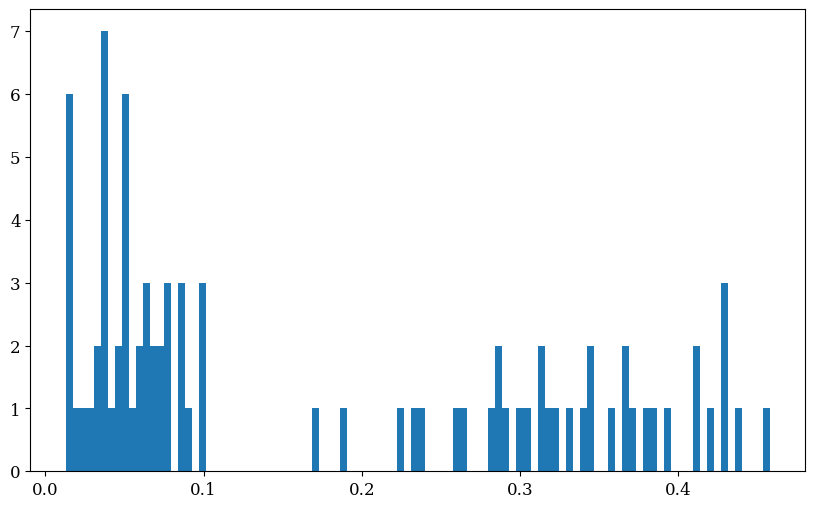

In [ ]:
plt.hist(a.density,bins=100)

In [ ]:
from ovito.io import import_file

# Load the LAMMPS dump file
pipeline = import_file(xyz_file)

# Access the first frame (e.g., frame 0)
data = pipeline.compute(0)

# Extract positions
positions = data.particles.positions

# Convert to NumPy array
positions_np = np.array(positions)

In [ ]:
data.cell[1]

array([ 0.    , 42.9828,  0.    ,  0.    ])

In [ ]:
pipeline.num_frames

1001